In [2]:
import columns
import paths
from utils import *

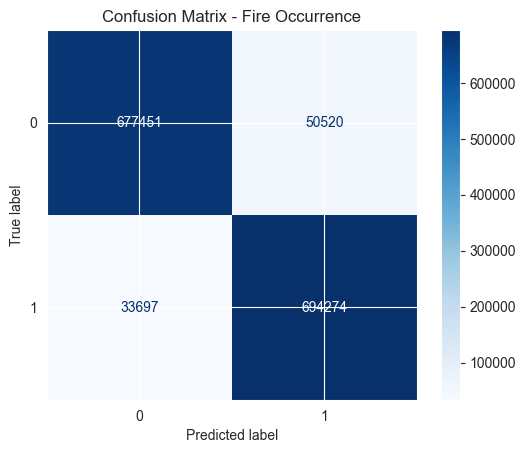

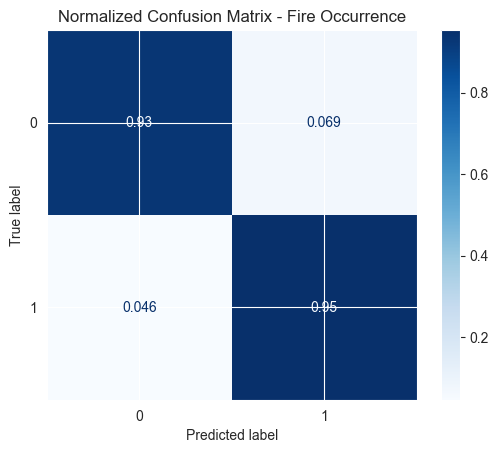

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from catboost import CatBoostClassifier

# ---------- Load Test Data
df = pd.read_csv(paths.inmet_inpe_linked_file)
df = downsample_data(df)

Xc = df.drop(columns=[columns.fire_intensity_column, columns.fire_occurrence_column])
yc = df[columns.fire_occurrence_column]

_, Xc_test, _, yc_test = split_train_test(Xc, yc, stratify=yc)

# -------- Load Model
model_cls = CatBoostClassifier()
model_cls.load_model(paths.classifier_cbm_file)

# ---------- Predict on test data
y_pred = model_cls.predict(Xc_test)

# ---------- Compute confusion matrix
cm = confusion_matrix(yc_test, y_pred)

# ---------- Plot raw confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Fire Occurrence")
plt.savefig('visualizations/confusion_matrix_fire_occurrence.png')
plt.show()

# ---------- Plot normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=[0, 1])
disp_norm.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix - Fire Occurrence")
plt.savefig('visualizations/normalized_confusion_matrix_fire_occurrence.png')
plt.show()